# DATA EXPLORATION
Dànae Canillas Sánchez

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

path_file = "data/generated/clean_train.csv"
data = pd.read_csv(path_file)

data["stage"] = data["stage"].astype(int).astype("category")

data["binned_age"] = data["age_at_diagnosis"].round().astype(int).astype("category")
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
data["binned_age"] = pd.cut(data["binned_age"], range(0, 105, 10), right=False, labels=labels)

data["RFS [years]"] = data["RFS"].dropna().astype(int).astype("category")
labels = ["{0} - {1}".format(int(i/365), int(i/365+2)) for i in range(0, max(data["RFS [years]"]), 365*2)]
data["RFS [years]"] = pd.cut(data["RFS [years]"].dropna(), range(0, max(data["RFS [years]"])+365, 365*2), right=False, labels=labels)

#data.to_csv("data/pathwayscores.csv",index=False)

## Value ranges

In [146]:
def range_boxplot(kind):
    '''
    Continuous variables 
    -> kind:: ['genes', 'age_at_diagnosis', 'RFS']
    '''
    if kind == "genes":
        fig = px.box(data[['Cell_Cycle', 'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53', 'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2']], title = "Gene box plot", orientation='v', height = 500, width= 1000)
    
    elif kind == "age_at_diagnosis":
        fig = px.box(x = data[kind], y = data['PAM50'], color = data['PAM50'], title = "Age at diagnosis" + " boxplot", orientation='h', width= 500)

    else:
        fig = px.box(x = data[kind][data['RFSE'] == 1], y=data['PAM50'][data['RFSE'] == 1], title = "RFS" + " boxplot", color = data['PAM50'][data['RFSE'] == 1], orientation='h', height = 500, width= 700)
    fig.show()

In [104]:
range_boxplot("RFS")

## Conditioned Ranges

In [176]:
def cond_range_boxplot(kind):
    '''
    Discrete variables 
    -> kind:: ['age', 'RFS', 'stage', 'PAM50', 'RFSE']
    '''
    features = ['Cell_Cycle', 'HIPPO', 'MYC', 'NOTCH', 'NRF2', 'PI3K', 'TGF.Beta', 'RTK_RAS', 'TP53', 'WNT', 'Hypoxia', 'SRC', 'ESR1', 'ERBB2']

    order = {"age": {"binned_age": ["20 - 29", "30 - 39","40 - 49","50 - 59","60 - 69","70 - 79","80 - 89","90 - 99"]}, "RFS": {"RFS [years]": ["0 - 2", "2 - 4","4 - 6","6 - 8","8 - 10","10 - 12","12 - 14","14 - 16"]}}

    if kind == "age":
        features.append('binned_age')
        fig = px.box(data[features], title = "Pathways boxplot conditioned by " + kind, color="binned_age", orientation='v', height = 500, width= 1000, category_orders=order["age"])

    elif kind == "RFS":
        features.append('RFS [years]')
        fig = px.box(data[features][data['RFSE'] == 1], title = "Pathways boxplot conditioned by " + kind, color="RFS [years]", orientation='v', height = 500, width= 1000, category_orders=order["RFS"])

    else:
        features.append(kind)
        fig = px.box(data[features], title = "Pathways boxplot conditioned by " + kind, color=kind, orientation='v', height = 500, width= 1000)
    fig.show()


In [177]:
cond_range_boxplot("binned_age")

## Value distribution



In [191]:
def pie_plot(kind):
    '''
    Discrete variables 
    -> kind:: ['binned_age', 'binned_RFS', 'stage', 'PAM50', 'RFSE']
    '''  

    labels = data[kind].value_counts().index
    values = data[kind].value_counts().values

    fig = px.pie(labels=labels, values=values, names=labels, title=kind + ' pie chart',width= 400, height= 400)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [192]:
pie_plot('PAM50')

## Correlation

<AxesSubplot:>

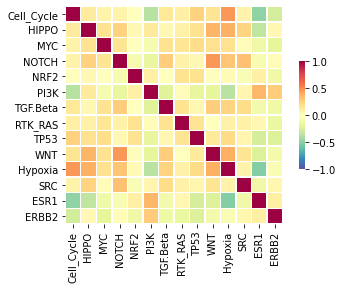

In [27]:
corr2 = recauen_2anys[features].corr()
corr3 = NOrecauen_3anys[features].corr()
corr5s = recauen_5anys[features].corr()
corr5n = NOrecauen_5anys[features].corr()

cmap = sns.color_palette("Spectral_r", as_cmap=True)
sns.heatmap(corr5n, cmap=cmap, vmax=1, vmin=-1,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})